In [206]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [207]:
# 1. Load CSV
df = pd.read_csv("student-mat.csv", sep=';')

In [208]:
y = df['G3']
X = df.drop(columns=['G3'])

print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [209]:
# 3. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

weak_features = [
    'Fjob_services','Fjob_other','schoolsup_yes','nursery_yes',
    'reason_home','activities_yes','paid_yes','famsup_yes',
    'Walc','internet_yes','sex_M'
]

# Only drop those that exist (safe drop)
weak_features = [f for f in weak_features if f in X.columns]
X_reduced = X.drop(columns=weak_features)

In [210]:
# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

In [211]:
# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=20
)

In [212]:
# 4. Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [213]:
# 5. Predict
y_pred = model.predict(X_test)

In [214]:
# 6. Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 2.801566299467434
R² Score: 0.8552673271610991


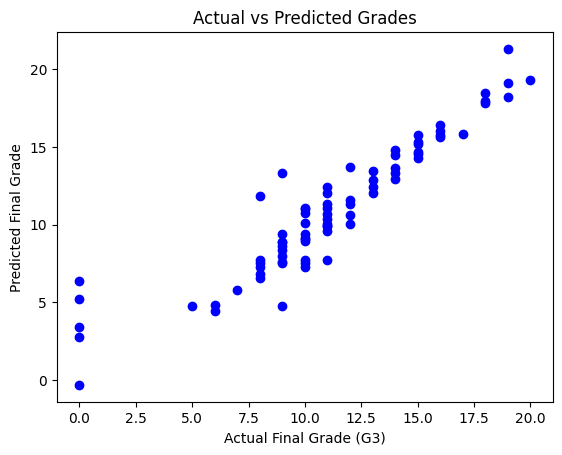

In [215]:
# 7. Plot predicted vs actual
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Final Grade (G3)")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Grades")
plt.show()

In [216]:
# 8. Print learned coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.28623557  0.17100752 -0.15586478 -0.01129139 -0.18101383 -0.17572053
  0.32113032  0.08686869  0.01715033 -0.06486292  0.17446391  0.51168824
  0.59477585  3.58552501  0.17401821  0.03416803  0.03873822 -0.08529918
 -0.07820698  0.06236239 -0.08785641 -0.12440923  0.10095603  0.1126506
  0.07507988  0.12165464  0.15029543  0.06213999 -0.08136379 -0.12046839]
Intercept: 10.3888994366673


In [218]:
# 1. Raw row (no encoding)
row3 = df.drop(columns=['G3']).iloc[4]

# 2. One-hot encode + align to training columns
row3 = pd.get_dummies(pd.DataFrame([row3]), drop_first=True)
row3 = row3.reindex(columns=X_reduced.columns, fill_value=0)

# 3. Scale
row3_scaled = scaler.transform(row3)

# 4. Predict
predicted = model.predict(row3_scaled)[0]

print("Actual G3:", y.iloc[2])
print("Predicted G3:", round(predicted, 4))

Actual G3: 10
Predicted G3: 9.3613
